### In this code tic tac toe game is implemented, one move is for human and the other move is for computer.
### Computer try to win if possible.
### If win not possible in the next move then it tries to avoid wining of the other player.
#### If both above option not met then computer chooses best possible option which has greatest number of win options.


In [1]:
import random
import time
from IPython.display import clear_output

def generateCombi(lst):
    temp = []
    temp.append([lst[0], lst[1], lst[2]])
    temp.append([lst[0], lst[2], lst[1]])
    
    temp.append([lst[1], lst[0], lst[2]])
    temp.append([lst[1], lst[2], lst[0]])
    
    temp.append([lst[2], lst[1], lst[0]])
    temp.append([lst[2], lst[0], lst[1]])
    return temp
    

def winCombi(lst):
    allWinCombi = []
    for i in lst:
        allWinCombi.extend(generateCombi(i))
    return allWinCombi

def printTicTacToe(gameValue):
    clear_output(wait=True)
    ind = 0
    for i in range(3):
        for j in range(3):
            print(gameValue[ind].ljust(5), end='', flush=True)
            ind += 1
        print('\n\n')

def winCheckForLength4(arr, allWinCombi):
    temp = [arr[0], arr[1], arr[2]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[1], arr[3]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[2], arr[3]]
    if temp in allWinCombi:
        return True
    temp = [arr[1], arr[2], arr[3]]
    if temp in allWinCombi:
        return True
    return False

def winCheckForLength5(arr, allWinCombi):
    temp = [arr[0], arr[1], arr[2]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[1], arr[3]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[1], arr[4]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[2], arr[3]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[2], arr[4]]
    if temp in allWinCombi:
        return True
    temp = [arr[0], arr[3], arr[4]]
    if temp in allWinCombi:
        return True
    temp = [arr[1], arr[2], arr[3]]
    if temp in allWinCombi:
        return True
    temp = [arr[1], arr[2], arr[4]]
    if temp in allWinCombi:
        return True
    temp = [arr[2], arr[3], arr[4]]
    if temp in allWinCombi:
        return True
    return False

def isWin(gameArr, allWinCombi, isEven):
    even = []
    odd = []
    for i in range(len(gameArr)):
        if i%2 == 0:
            even.append(int(gameArr[i])) 
        else:
            odd.append(int(gameArr[i]))
    
    if isEven:
        if len(even) == 3:
            if even in allWinCombi:
                return True
        elif len(even) == 4:
            if winCheckForLength4(even, allWinCombi):
                return True
        elif len(even) == 5:
            if winCheckForLength5(even, allWinCombi):
                return True
    else:
        if len(odd) == 3:
            if odd in allWinCombi:
                return True
        elif len(odd) == 4:
            if winCheckForLength4(odd, allWinCombi):
                return True
    return False
        
            
    
def nextMove(data, isEven, start, allWinCombi, gameValue):
    dic = {
        '0': 0,
        '1': 0,
        '2': 0,
        '3': 0,
        '4': 0,
        '5': 0,
        '6': 0,
        '7': 0,
        '8': 0
    }

    for i in data:
        temp = []
        
        if i.startswith(start):
            if isEven:
                temp = [int(i[0]), int(i[2]), int(i[4]), int(i[6]), int(i[8])]
                if winCheckForLength5(temp, allWinCombi):
                    dic[i[len(start)]] += 1
            else:
                
                temp = [int(i[1]), int(i[3]), int(i[5]), int(i[7])]
                if winCheckForLength4(temp, allWinCombi):
                    dic[i[len(start)]] += 1
    highest = -1
    mov = ''
    for key, value in dic.items(): #try to win
        if len(start) >= 4 and value != 0:
            if isWin(start+key, allWinCombi, isEven):
                return key
    if len(start) < 7:            
        for key, value in dic.items(): #protect human to be winner
            if len(start) >= 3 and gameValue[int(key)] != 'X' and gameValue[int(key)] != 'O':
                if isWin(start+'0'+key, allWinCombi, not isEven):
                    return key
            
    for key, value in dic.items(): #best mov to be winner
        if highest < value and gameValue[int(key)] != 'X' and gameValue[int(key)] != 'O':
            highest = value
            mov = key
            
    return mov
    

lst = [
    [0,1,2],
    [3,4,5],
    [6,7,8],
    [0,3,6],
    [1,4,7],
    [2,5,8],
    [2,4,6],
    [0,4,8]
]
allWin = winCombi(lst)

turn = random.randint(0,1)

f = open('AlldigitSequenceFile.txt', 'r')
data = f.readlines()

data = [item.strip('\n') for item in data]

isEven = False
if turn == 0:
    isEven = True
    
gameValue = {
    0:'0',
    1:'1',
    2:'2',
    3:'3',
    4:'4',
    5:'5',
    6:'6',
    7:'7',
    8:'8'
}

gameArr=''
mov = ''
for i in range(9):
    printTicTacToe(gameValue)
    print('\n')
    if turn == 0: #Computers Turn
        print('Computer\'s Turn')
        mov = nextMove(data, isEven, gameArr, allWin, gameValue)
        if len(gameArr) > 0:
            time.sleep(1.6)
        gameArr += mov
        gameValue[int(mov)] = 'X'
        if isWin(gameArr, allWin, isEven):
            printTicTacToe(gameValue )
            print('Computer Wins')
            print('Path:', gameArr)
            break
        turn = 1
    else:
        mov = input('Your turn: ')
        while(not mov.isnumeric or mov not in gameValue.values()):
            print('Invalid move')
            mov = input('Choose next mov again: ')
        gameArr += mov
        gameValue[int(mov)] = 'O'
        if isWin(gameArr, allWin, not isEven):
            printTicTacToe(gameValue )
            print('You Win')
            print('Path:', gameArr)
            break
        turn = 0
if len(gameArr) == 9:
    printTicTacToe(gameValue)
    print('Draw')
    print('Path:', gameArr)


X    1    O    


3    X    O    


6    7    X    


Computer Wins
Path: 45028


## Input Output Format:
## computer move is represented by: X
## Human move is represented by: O
## One move is for computer and next move is for user
## User can only choose available options.
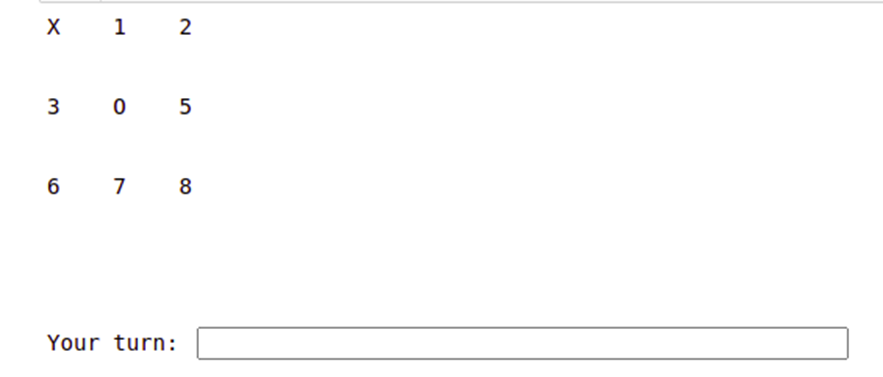